## Descripción

Este código resuelve la ecuación trascendental del viento estelar isotérmico unidimensional de Parker adimensional.  
Este tipo de viento es uno de los más comunes y constituye el caso base de estudio al adentrarse en los procesos

In [1]:
# Librerías a utilizar:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Definimos la configuración de las graficas

plt.rcParams.update({
    "font.family": "serif",
    "font.size": 12,
    "axes.linewidth": 1.0,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True
})


Como primer paso definimos la malla en el espacio $(\tilde{r},\tilde{v})$ así como la ecuación de Parker

In [4]:
# Mallado r y v

r = np.linspace(0.3, 5, 500)
V = np.linspace(0.01, 3.5, 500)
R, Vv = np.meshgrid(r, V)

# Ecuación de Parker
def parker_eq(v, r, C):
    return (v**2 - np.log(v**2)) - (4*np.log(r) + 4/r + C)


Con motivo de explorar la implicancia física en el cambio de la constante de integración, utilizamos un rango de $\pm2$, esto nos dará una representación de las curvas de nivel (contour lines) del espacio de soluciones.

In [5]:
# Constantes a graficar
C_values = [-5, -4, -3, -2,-1]

# Colores bien diferenciados (Nos aseguramos que los colores de cada curva no se parezcan)
cmap = plt.cm.plasma
colors = [cmap(i/len(C_values)) for i in range(len(C_values))]


## Gráfica de soluciones del viento de Parker

Para resolver la ecuación trascendental implícita del viento estelar isotérmico de Parker, optamos por un enfoque geométrico utilizando `matplotlib`. Esto permite mantener el código limpio y visualmente intuitivo

- Cada valor de la constante \(C\) genera una curva de nivel correspondiente a una solución particular de la ecuación.  
- La curva con \(C=-3\) se resalta en negro para identificar claramente la solución de interés.  
- El punto crítico se marca con un punto rojo, representando la transición entre el régimen subsonico y supersónico del viento.  



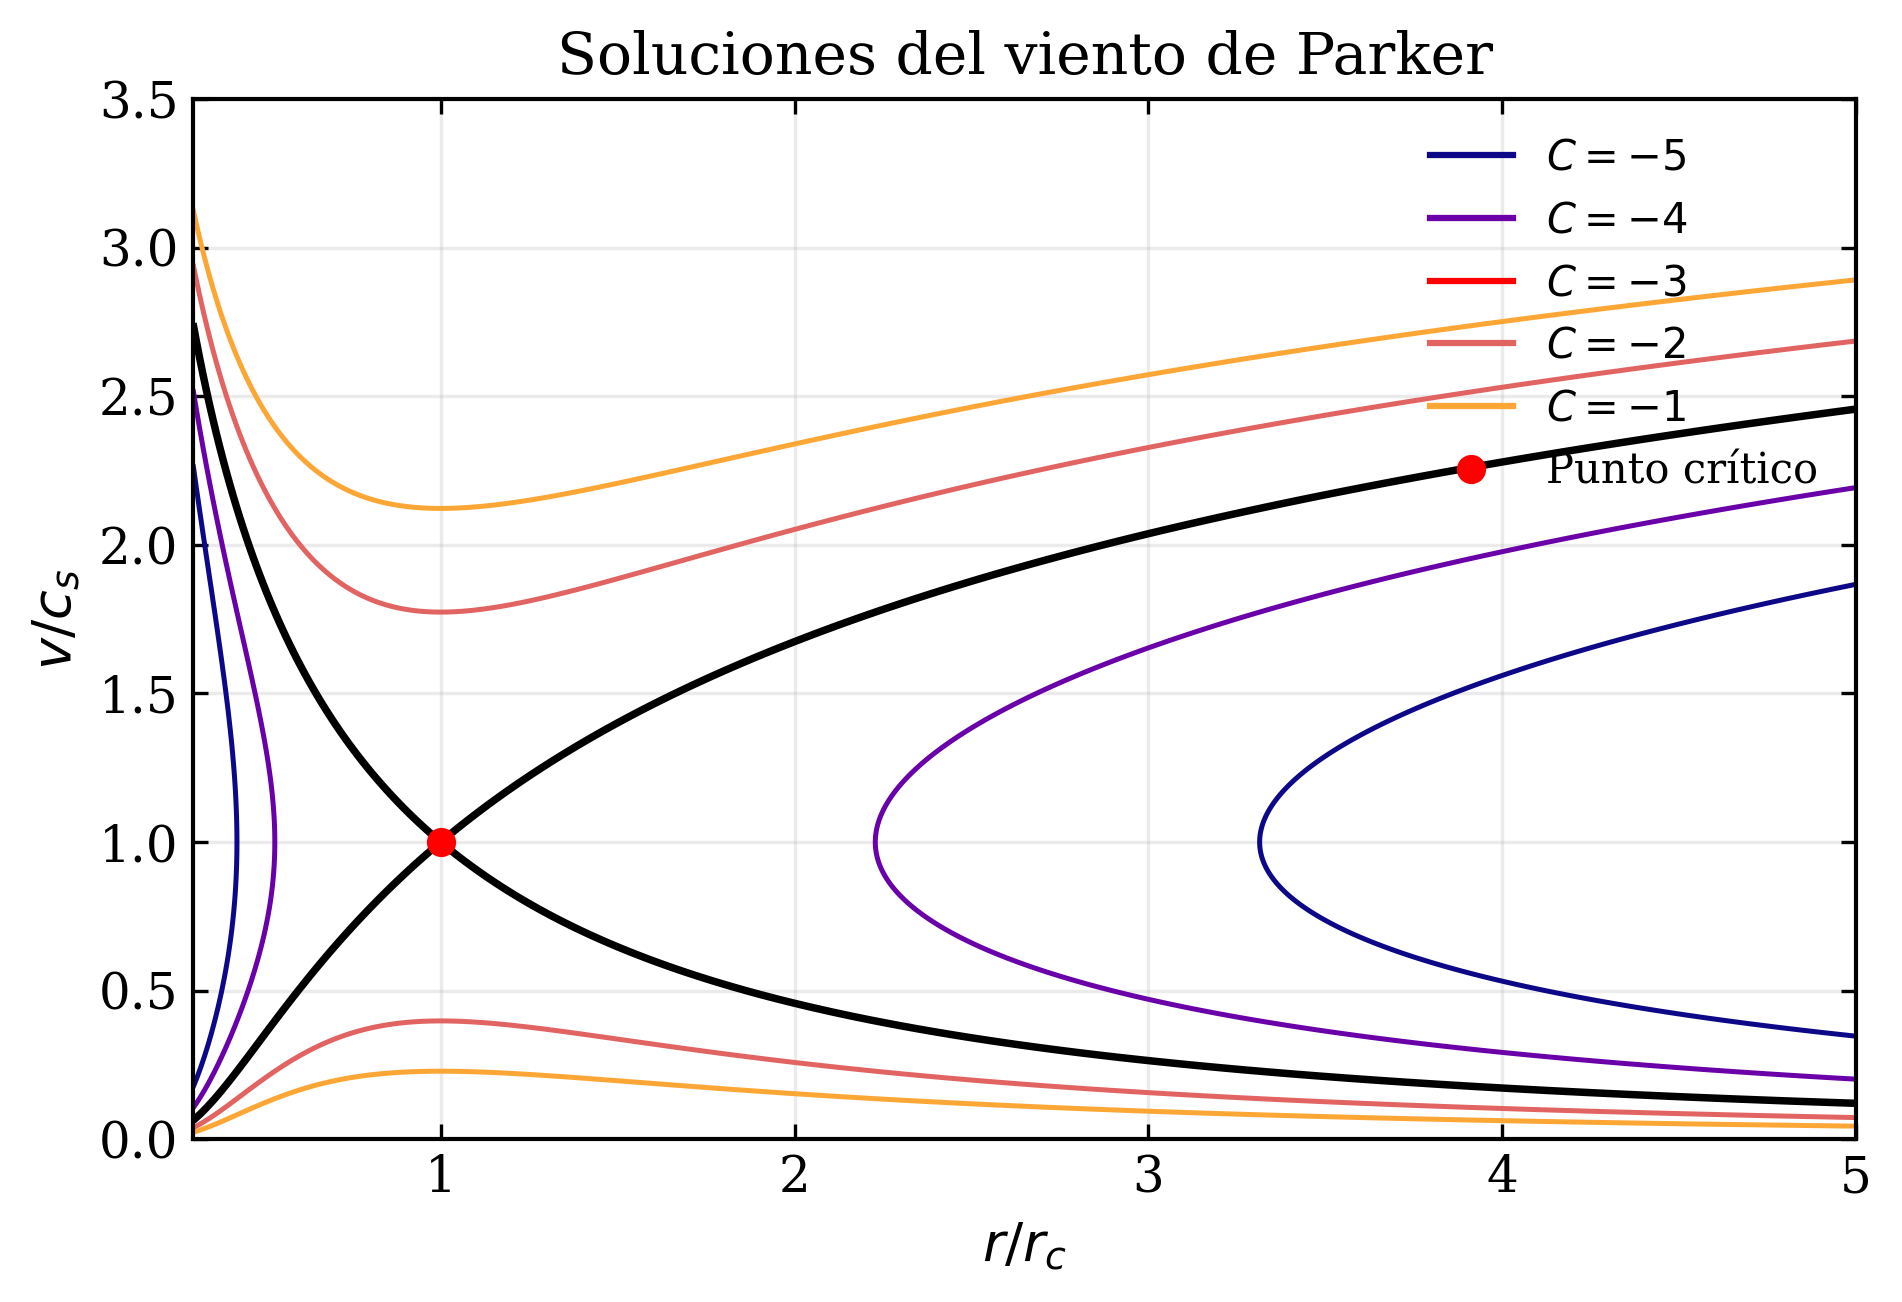

In [6]:


# Gráfica

fig, ax = plt.subplots(figsize=(6.5, 4.5), dpi=300)

for C, col in zip(C_values, colors):
    Z = parker_eq(Vv, R, C)
    if C == -3:
        # Resaltar curva C=-3
        cs = ax.contour(R, Vv, Z, levels=[0], colors=['black'], linewidths=1.8)
    else:
        cs = ax.contour(R, Vv, Z, levels=[0], colors=[col], linewidths=1.2)
    # Proxy para leyenda
    ax.plot([], [], color=col if C != -3 else 'red', label=f"$C={C}$")

# Punto crítico
ax.plot(1, 1, 'ro', label="Punto crítico")

# Etiquetas y detalles
ax.set_xlabel(r"$r/r_c$", fontsize=13)
ax.set_ylabel(r"$v/c_s$", fontsize=13)
ax.set_title("Soluciones del viento de Parker", fontsize=14)
ax.legend(frameon=False, fontsize=10)
ax.set_xlim(0.3, 5)
ax.set_ylim(0, 3.5)
ax.grid(alpha=0.25)

# Márgenes ajustados
fig.tight_layout()



plt.show()
